### Model evaluation using cross-validation


In [2]:
import pandas as pd
import numpy as np
np.set_printoptions(legacy='1.25')

In [3]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=target_name)

In [4]:
numerical_columns = ["age", "capital-gain", "capital-loss", "hours-per-week"]
data_numeric = data[numerical_columns]

In [7]:
# continue here

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


In [9]:
model = make_pipeline(StandardScaler(), LogisticRegression())

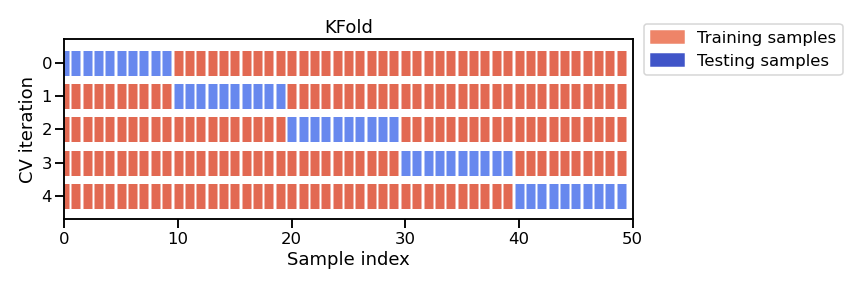

In [10]:
from sklearn.model_selection import cross_validate

In [20]:
?cross_validate

Signature:
cross_validate(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    params=None,
    pre_dispatch='2*n_jobs',
    return_train_score=False,
    return_estimator=False,
    return_indices=False,
    error_score=nan,
)
Docstring:
Evaluate metric(s) by cross-validation and also record fit/score times.

Read more in the :ref:`User Guide <multimetric_cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs), default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Onl

In [13]:
cv_result = cross_validate(model, y=target, X=data_numeric, cv=5)

In [14]:
cv_result

{'fit_time': array([0.04593873, 0.06396198, 0.06531525, 0.0647285 , 0.06395078]),
 'score_time': array([0.0120492 , 0.01162267, 0.01198673, 0.01225948, 0.01173139]),
 'test_score': array([0.79557785, 0.80049135, 0.79965192, 0.79873055, 0.80456593])}

In [16]:
scores = cv_result["test_score"]

In [17]:
scores

array([0.79557785, 0.80049135, 0.79965192, 0.79873055, 0.80456593])

In [18]:
scores_mean = scores.mean()
scores_std = scores.std()

In [19]:
print(f"The mean cross-validation accuracy is: {scores_mean} +/- {scores_std}")

The mean cross-validation accuracy is: 0.7998035202866813 +/- 0.0029046240751883553


**Optional exercise**

- look at the documentation of the `cross_validate` function. explore different evaluation metrics than accuracy.
- Using the existing data set, build a full pipeline with scalars, models and cross-validation. Explore different options for cross-validation, following [section 3.1 in the sklearn user guide](https://scikit-learn.org/stable/modules/cross_validation.html).
